In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('/content/diminos_data.csv')

In [14]:
df.head()

order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056

In [15]:
df.tail()

order_id      order_placed_at          order_delivered_at
14995   1538106  2023-03-27 23:37:05  2023-03-27 23:52:37.409378
14996   1538107  2023-03-27 23:47:38  2023-03-28 00:04:22.672912
14997   1538108  2023-03-27 23:50:16  2023-03-28 00:05:40.676238
14998   1538109  2023-03-27 23:52:44  2023-03-28 00:08:41.810358
14999   1538110  2023-03-27 23:58:20  2023-03-28 00:13:42.499311

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [17]:
df.describe()

order_id
count  1.500000e+04
mean   1.530610e+06
std    4.330271e+03
min    1.523111e+06
25%    1.526861e+06
50%    1.530610e+06
75%    1.534360e+06
max    1.538110e+06

In [18]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [20]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])


In [21]:
df.head()


order_id     order_placed_at         order_delivered_at
0   1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132
1   1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241
2   1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385
3   1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399
4   1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056

In [25]:
df.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
dtype: object

In [26]:
df['delivery_time_minutes'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60


In [27]:
df.head()

order_id     order_placed_at         order_delivered_at  \
0   1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132   
1   1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241   
2   1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385   
3   1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399   
4   1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056   

   delivery_time_minutes  
0              17.140719  
1              15.598754  
2              15.104856  
3              38.533657  
4              16.176984

In [28]:
df['delivery_time_minutes'].quantile(0.95)

np.float64(27.261043996666658)

In [29]:
(df['delivery_time_minutes'] <= 31).mean() * 100


np.float64(96.28666666666666)

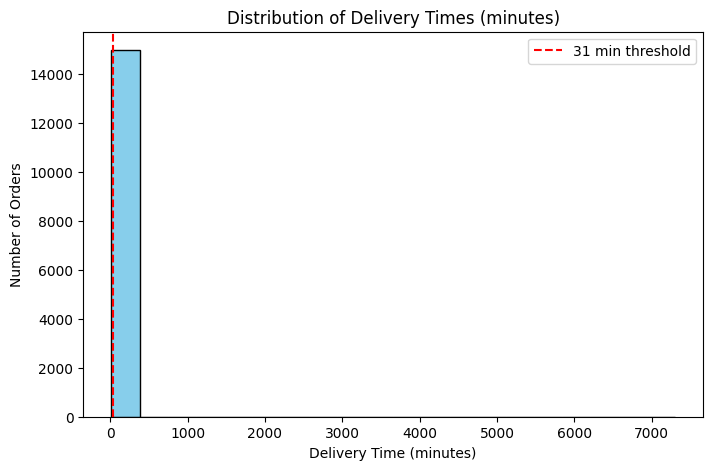

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['delivery_time_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(31, color='red', linestyle='--', label='31 min threshold')
plt.title('Distribution of Delivery Times (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()
